<a href="https://colab.research.google.com/github/berkaykarlik/whoIsThatPokemon_CNN/blob/master/vgg16_notebook_Ver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
from keras import models
from keras import layers
from keras.optimizers import SGD
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from shutil import copy
from shutil import rmtree

Using TensorFlow backend.


In [0]:
from google.colab import files
uploaded = files.upload()
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [0]:
!kaggle datasets download -d lantian773030/pokemonclassification
!unzip pokemonclassification.zip

In [0]:
path = 'PokemonData'
if os.path.exists('train'):
    rmtree('train')
if os.path.exists('validate'):
    rmtree('validate')
if os.path.exists('test'):
    rmtree('test')

In [0]:
os.mkdir('train')
os.mkdir('validate')
os.mkdir('test')

In [0]:
image_count = 0
class_count = 0
classes = []
for i in os.listdir(path):
    classes.append(i)
    class_path = os.path.join(path, i)
    if not os.path.exists(os.path.join('train', i)):
        os.mkdir(os.path.join('train', i))
    if not os.path.exists(os.path.join('validate', i)):
        os.mkdir(os.path.join('validate', i))
    if not os.path.exists(os.path.join('test', i)):
        os.mkdir(os.path.join('test', i))
    image_paths = []
    for j in os.listdir(class_path):
        image_paths.append(os.path.join(class_path, j))
        image_count += 1
    np.random.shuffle(image_paths)
    training_path = image_paths[:int(len(image_paths) * .80)]
    test_path = image_paths[int(len(image_paths) * .80):]
    valid_path = training_path[int(len(training_path) * .80):]
    training_path = training_path[:int(len(training_path) * .80)]
    for j in training_path:
        copy(j, os.path.join('train', i))
    for j in valid_path:
        copy(j, os.path.join('validate', i))
    for j in test_path:
        copy(j, os.path.join('test', i))
    class_count += 1
print(image_count)
print(class_count)

6837
150


In [0]:
train_data_generator = ImageDataGenerator()
train_data = train_data_generator.flow_from_directory(directory='train', target_size=(224,224))

validate_data_generator = ImageDataGenerator()
validate_data = validate_data_generator.flow_from_directory(directory='validate', target_size=(224,224))

test_data_generator = ImageDataGenerator()
test_data = test_data_generator.flow_from_directory(directory='test', target_size=(224,224))

Found 4251 images belonging to 150 classes.
Found 1141 images belonging to 150 classes.
Found 1428 images belonging to 150 classes.


In [0]:
pre_trained_model = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False, pooling='avg')
pre_trained_model.trainable = False

In [0]:
print(pre_trained_model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
prediction_layer = layers.Dense(150)
total_model = models.Sequential([pre_trained_model, prediction_layer])
total_model.compile(loss='categorical_crossentropy', optimizer = SGD(lr=0.01, momentum=0.9), metrics = ['accuracy'])
print(total_model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense_2 (Dense)              (None, 150)               76950     
Total params: 14,791,638
Trainable params: 76,950
Non-trainable params: 14,714,688
_________________________________________________________________
None


In [0]:
history = total_model.fit(train_data, validation_data=validate_data, epochs=5)


Epoch 1/5
133/133 [==============================] - 38s 284ms/step - loss: 5.5848 - accuracy: 0.0064 - val_loss: 5.5609 - val_accuracy: 0.0070
Epoch 2/5
133/133 [==============================] - 36s 269ms/step - loss: 5.2488 - accuracy: 0.0068 - val_loss: 5.5535 - val_accuracy: 0.0070
Epoch 3/5
133/133 [==============================] - 36s 269ms/step - loss: 5.1460 - accuracy: 0.0068 - val_loss: 4.9904 - val_accuracy: 0.0070
Epoch 4/5
133/133 [==============================] - 35s 266ms/step - loss: 5.0535 - accuracy: 0.0068 - val_loss: 4.7020 - val_accuracy: 0.0070
Epoch 5/5
133/133 [==============================] - 36s 270ms/step - loss: 4.9581 - accuracy: 0.0068 - val_loss: 4.8200 - val_accuracy: 0.0070


In [0]:
accuracy = total_model.evaluate(test_data)

45/45 [==============================] - 10s 220ms/step


In [0]:
print("Accuracy:", accuracy)

Accuracy: [5.213833808898926, 0.007002801168709993]


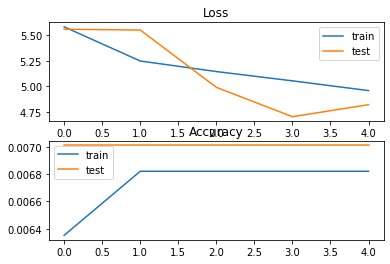

In [0]:
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()